# Project1: Bankruptcy Prevention:
Business Objective:
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

The data file contains 7 features about 250 companies

The data set includes the following variables:

#### 1.industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### 2.management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### 3.financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
#### 4.credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
#### 5.competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
#### 6.operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
#### 7.class: bankruptcy=0, non-bankruptcy=1 (target variable).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
data=pd.read_excel('Bankruptcy (2).xlsx')

# EDA

In [5]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [6]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [7]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [8]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


#### Check for Null Values in the data

In [10]:
data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

#### To Calculate the Statistical Summary

In [182]:
print('Statistical Summary: ')
data.describe()

Statistical Summary: 


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
#it checks for duplicate values in the data
data.duplicated().sum()

147

In [13]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### Visualizations

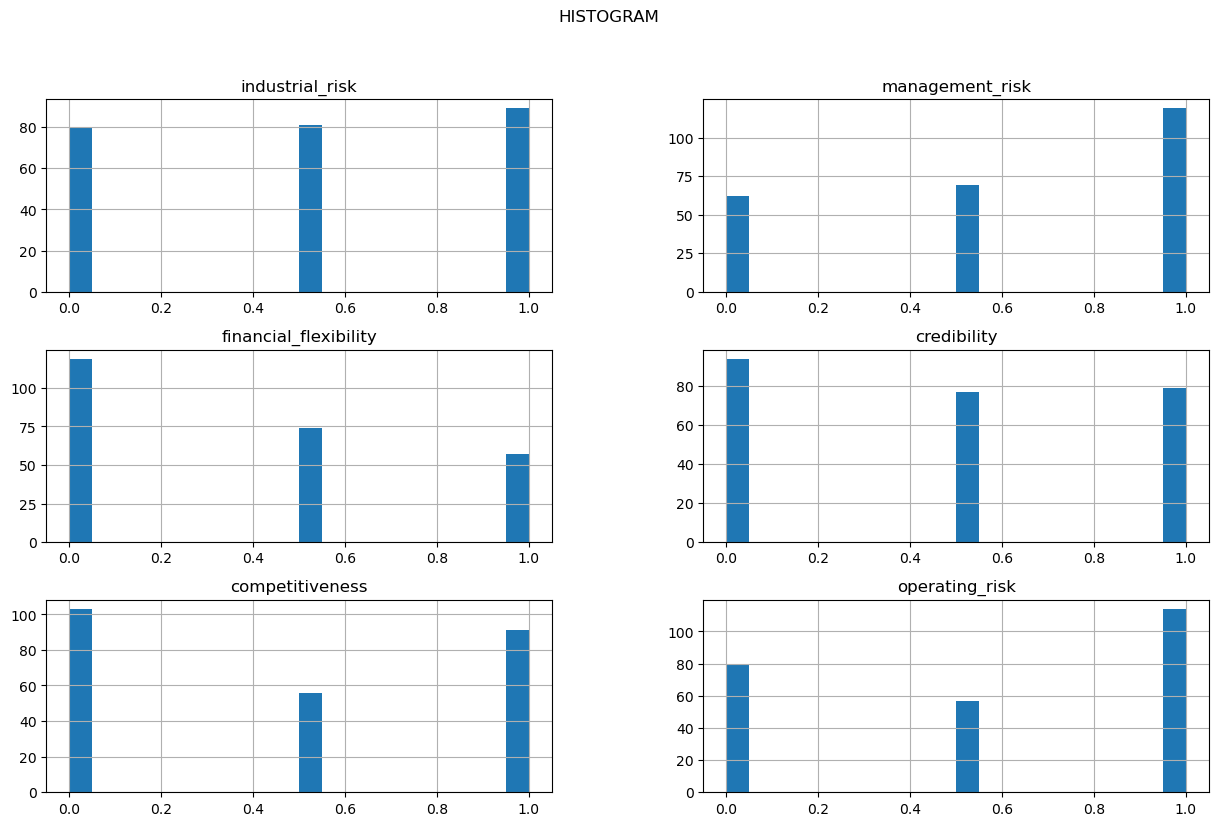

In [14]:
#histogram
data.hist(bins=20,figsize=(15,9))
plt.suptitle('HISTOGRAM')
plt.show()

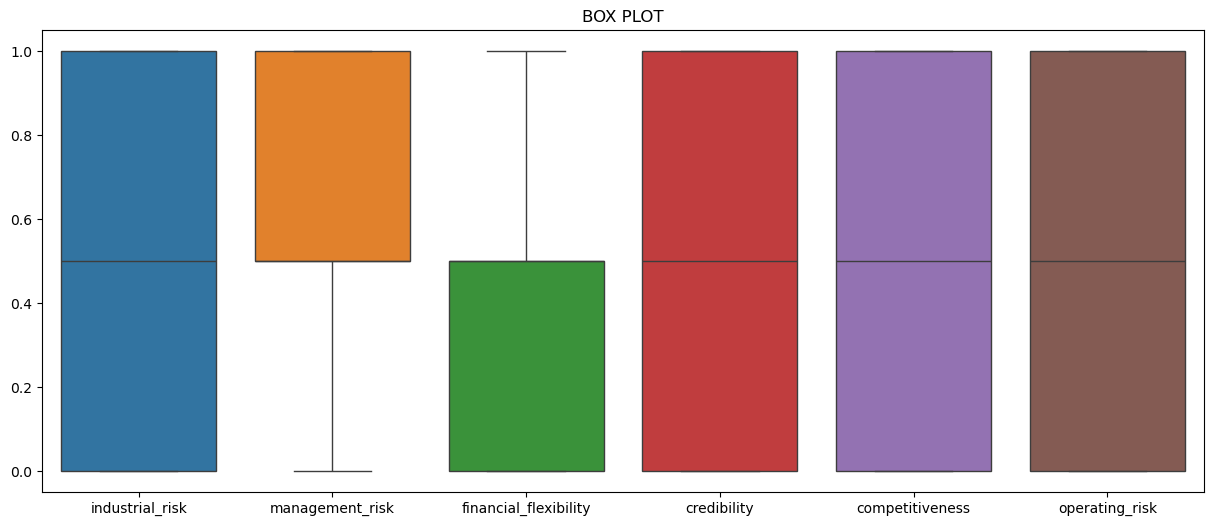

In [15]:
#box plot
plt.figure(figsize=(15,6))
sns.boxplot(data)
plt.title('BOX PLOT')
plt.show()

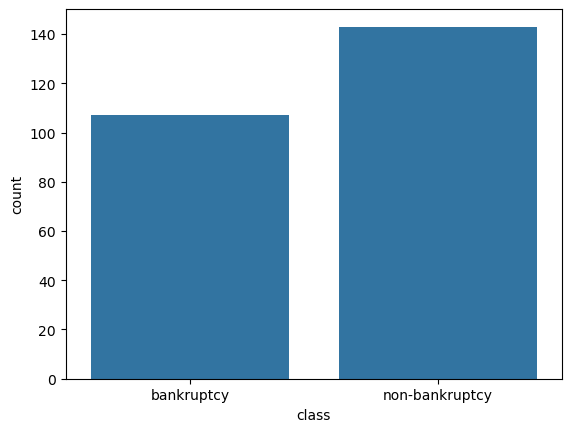

In [16]:
#count plot
sns.countplot(data=data,x='class')
plt.show()

In [17]:
data['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

## Corrlation Heatmap

In [18]:
correlation_matrix=data.select_dtypes(include='float64').corr()

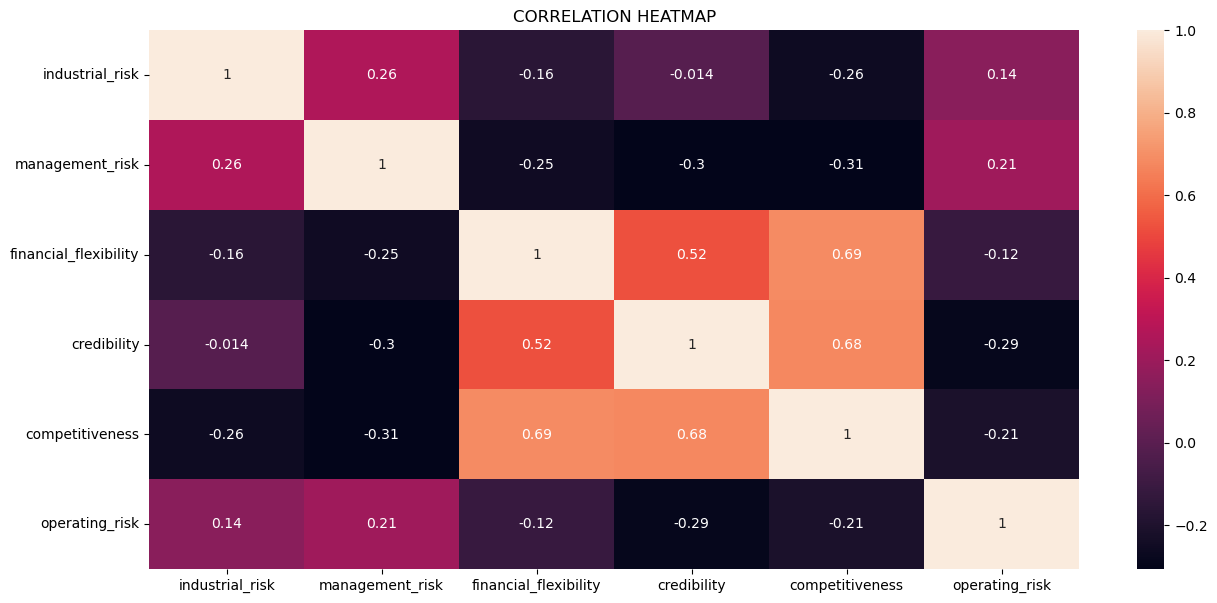

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix,annot=True)
plt.title('CORRELATION HEATMAP')
plt.show()

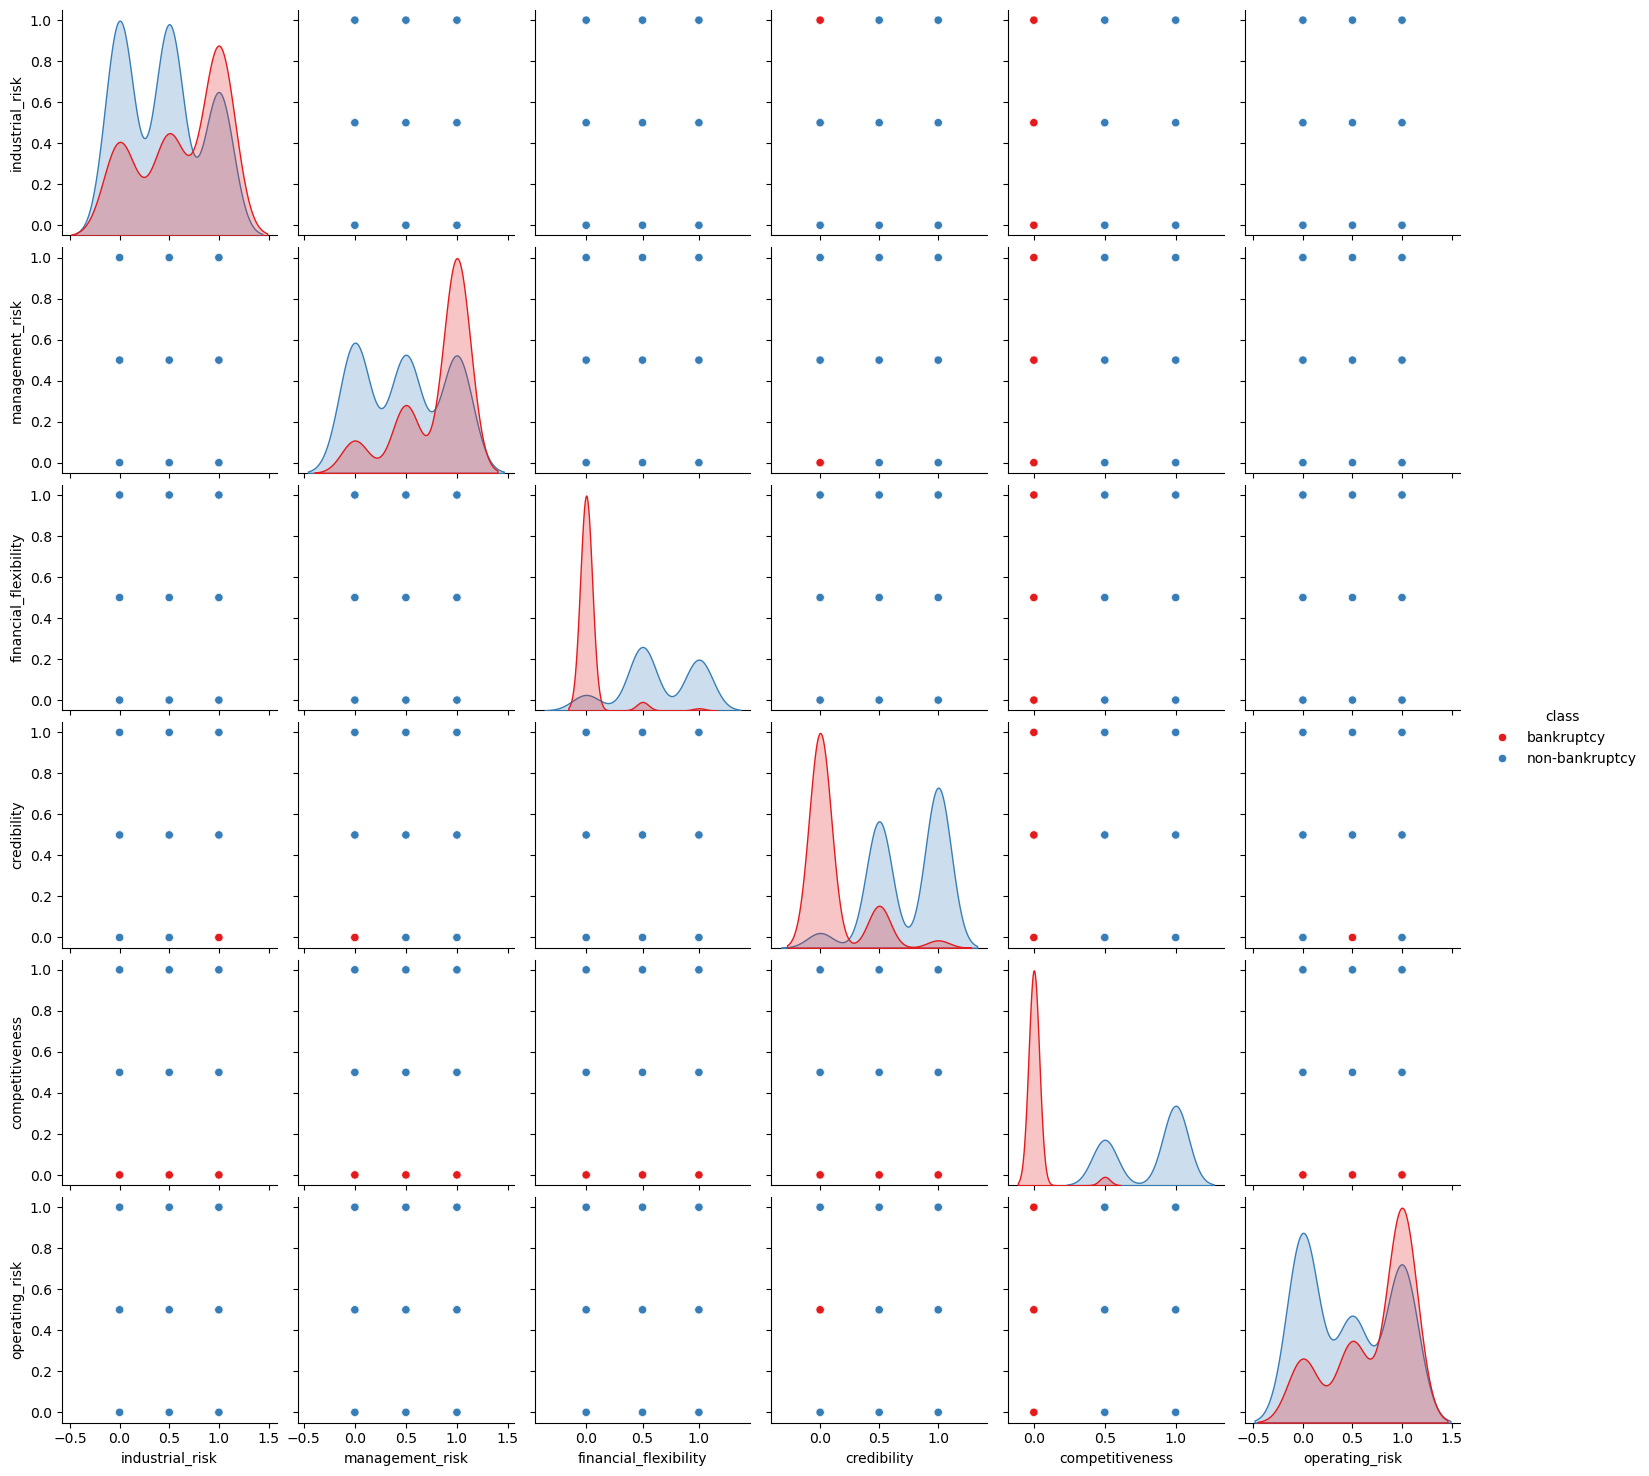

In [20]:
sns.pairplot(data, hue='class', palette='Set1')
plt.show()

In [21]:
#data.duplicated().sum()
#data=data.drop_duplicates
#data=data.reset_index()
#data=data.drop('index',axis=1)

### Label Encoder

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label=LabelEncoder()

In [24]:
data['class']=label.fit_transform(data['class'])

In [25]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


### CORRELATION HEATMAP after label encoding

In [26]:
cm=data.corr()

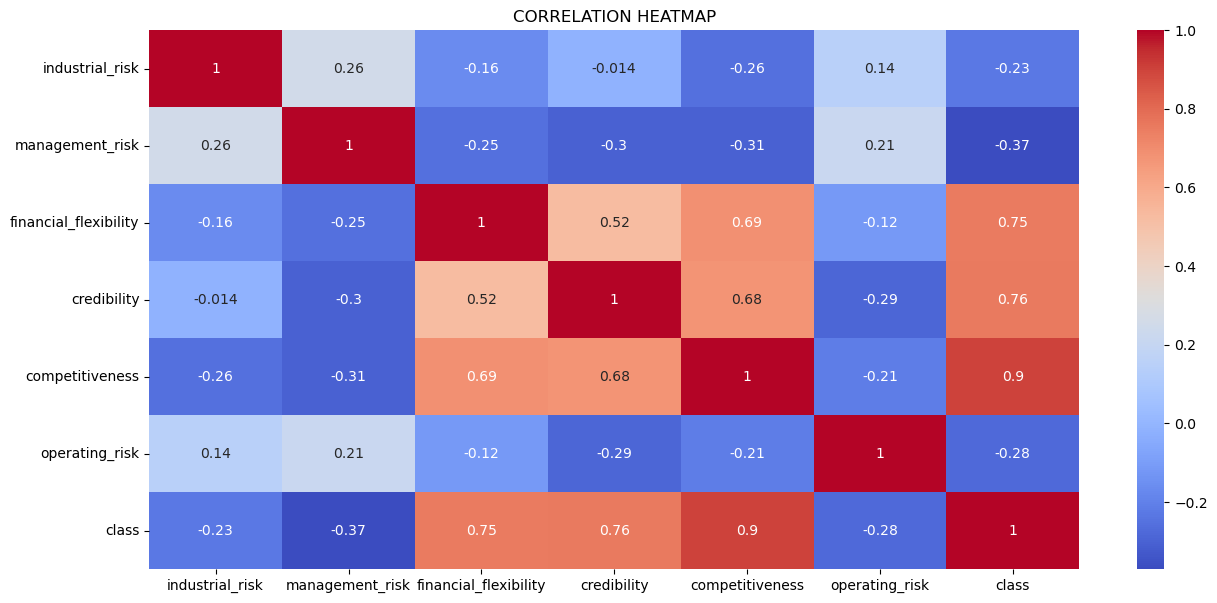

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.title('CORRELATION HEATMAP')
plt.show()

# MODEL BUILDING

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
features=data.drop('class',axis=1)
features

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [31]:
target=data[['class']]

In [32]:
target

,class
0,0
1,0
2,0
3,0
4,0
...,...
245,1
246,1
247,1
248,1


In [33]:
#spliting the data into training=70% and testing set=30%
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=35)

# 1.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [38]:
lg_y_pred=logreg.predict(x_test)
lg_y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve

In [41]:
confusion_matrix(y_test,lg_y_pred)

array([[37,  1],
       [ 0, 37]], dtype=int64)

Text(0.5, 1.0, 'LR')

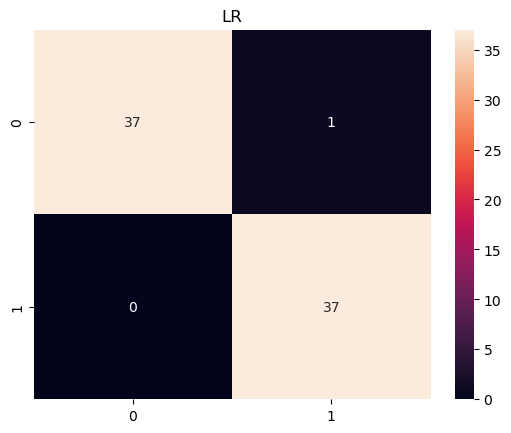

In [200]:
sns.heatmap(confusion_matrix(y_test,lg_y_pred),annot= True)
plt.title("LR")

In [42]:
print(classification_report(y_test,lg_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [43]:
# accuracy of logistic regression
acc_lr=accuracy_score(y_test,lg_y_pred)*100

In [44]:
acc_lr

98.66666666666667

# 2.Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
rf_y_pred=rf.predict(x_test)
rf_y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [50]:
confusion_matrix(y_test,rf_y_pred)

array([[38,  0],
       [ 0, 37]], dtype=int64)

Text(0.5, 1.0, 'RF')

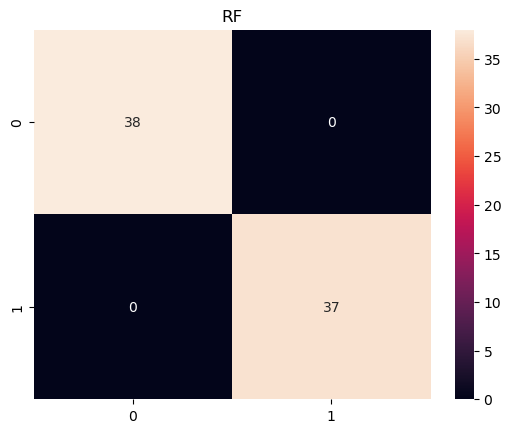

In [202]:
sns.heatmap(confusion_matrix(y_test,rf_y_pred),annot= True) 
plt.title("RF")

In [51]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [52]:
#ACCURACY OF RANDOM FOREST:
acc_rf=accuracy_score(y_test,rf_y_pred)*100

In [53]:
acc_rf

100.0

# 3.LGBM

In [55]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [56]:
import lightgbm as lgb

In [57]:
lgbm=lgb.LGBMClassifier()

In [196]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 106, number of negative: 69
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 175, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.605714 -> initscore=0.429333
[LightGBM] [Info] Start training from score 0.429333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier()

In [59]:
lgbm_y_pred=lgbm.predict(x_test)
lgbm_y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [162]:
confusion_matrix(y_test,lgbm_y_pred)

array([[38,  0],
       [ 1, 36]], dtype=int64)

Text(0.5, 1.0, 'LGBM')

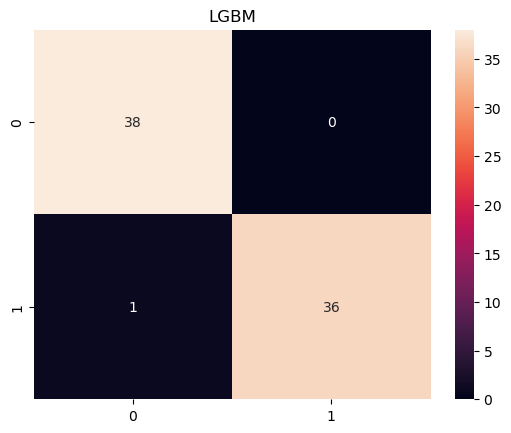

In [204]:
sns.heatmap(confusion_matrix(y_test,lgbm_y_pred),annot= True) 
plt.title("LGBM")

In [60]:
print(classification_report(y_test,lgbm_y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [61]:
acc_lgbm=accuracy_score(y_test,rf_y_pred)*100

In [62]:
#accuracy of LGBM MODEL
acc_lgbm

100.0

# 4.K-Nearest Neighbors

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()

In [66]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
knn_y_pred=knn.predict(x_test)
knn_y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0])

In [166]:
confusion_matrix(y_test,knn_y_pred)

array([[37,  1],
       [ 0, 37]], dtype=int64)

Text(0.5, 1.0, 'KNN')

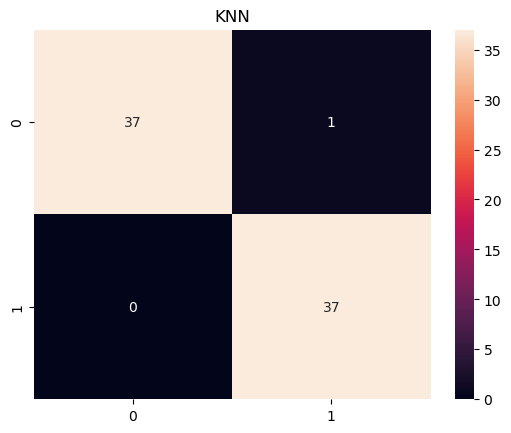

In [206]:
sns.heatmap(confusion_matrix(y_test,knn_y_pred),annot= True) 
plt.title("KNN")

In [68]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [69]:
#ACCURACY OF K-Nearest Neighbors:
acc_knn=accuracy_score(y_test,knn_y_pred)*100

In [70]:
acc_knn

98.66666666666667

# Model Evaluation

In [72]:
accuracy=pd.DataFrame({
    'Logistic Regression':acc_lr,
    'Random Forest':acc_rf,
    'LGBM':acc_lgbm,
    'KNN':acc_knn
},index=(1,))

In [73]:
accuracy

,Logistic Regression,Random Forest,LGBM,KNN
1,98.666667,100.0,100.0,98.666667


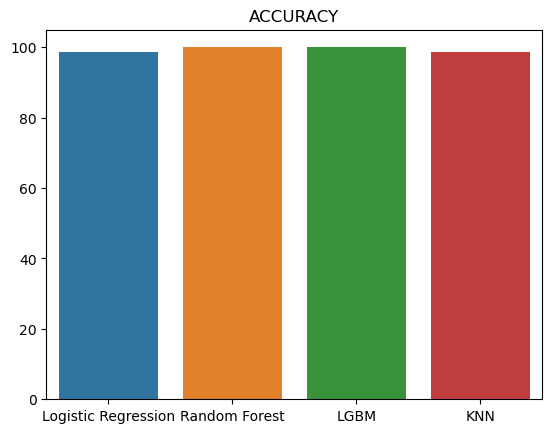

In [74]:
plt.title('ACCURACY')
sns.barplot(accuracy)
plt.show()

In [75]:
import pickle

In [76]:
pickle.dump(rf,open('rf.pkl','wb'))